<a href="https://colab.research.google.com/github/joybratas1/Credit-Card-Fraud-Project/blob/main/CreditCarFraud_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

##Getting the Dataset imported from Kaggle-
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
url_l='https://www.kaggle.com/mlg-ulb/creditcardfraud'
od.download(url_l)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joybratasarkar
Your Kaggle Key: ··········


  8%|▊         | 5.00M/66.0M [00:00<00:01, 44.2MB/s]

100%|██████████| 66.0M/66.0M [00:00<00:00, 92.6MB/s]


In [5]:
file_name='/content/creditcardfraud/creditcard.csv'

##Converting the CSV file to Pandas dataframe.

In [8]:
df= pd.read_csv(file_name)
df.dataframeName = 'European Credit card Fraud data.csv'
nRow, nCol = df.shape
print('There are {} rows and {} columns in our Dataset'.format(nRow,nCol))


There are 284807 rows and 31 columns in our Dataset


### Dataset Details and Values of the Rows and Columns 

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Observations
* Time, Amount and Class Column are recognisable.
* There are 29 Input Variables and 1 Output Variable (Class)
* V1-V28 are probably tranformed using PCA for confidentiality. It can be assumed that the data might be scaled as per normal conventions. Normalization is important in PCA since it is a variance maximizing exercise

We will check for null or missing values in the dataset.


In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* There is no null value in the dataset so we dont have to handle null values.


Removing the memory usage by the dataframe as it might take time when we will use predictive analysis.

In [16]:
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

df = reduce_memory(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 17.11 MB
Decreased by 74.6%


### Dataset Descriptivce Statistics

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94812.664062,-0.000062,0.000028,NaN,0.000053,0.000163,-0.000033,0.000001,-0.000022,-0.000013,0.000019,0.000021,0.000016,0.000031,0.000010,0.000035,2.384186e-07,0.000044,-0.000005,0.000013,4.768372e-07,0.000008,-0.000054,0.000011,0.000004,0.000068,-0.000007,-7.152557e-07,2.384186e-07,NaN,0.001727
std,47487.195312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.035645e-01,3.300781e-01,NaN,0.041527
min,0.000000,-56.406250,-72.687500,-48.312500,-5.683594,-113.750000,-26.156250,-43.562500,-73.187500,-13.437500,-24.593750,-4.796875,-18.687500,-5.792969,-19.218750,-4.500000,-1.413281e+01,-25.156250,-9.500000,-7.214844,-5.450000e+01,-34.843750,-10.929688,-44.812500,-2.835938,-10.296875,-2.605469,-2.256250e+01,-1.542969e+01,0.000000,0.000000
25%,54201.500000,-0.920410,-0.598633,-0.890137,-0.848633,-0.691406,-0.768066,-0.554199,-0.208618,-0.643066,-0.535645,-0.762695,-0.405518,-0.648438,-0.425537,-0.583008,-4.680176e-01,-0.483643,-0.498779,-0.456299,-2.116699e-01,-0.228394,-0.542480,-0.161865,-0.354492,-0.317139,-0.326904,-7.086182e-02,-5.294800e-02,5.601562,0.000000
50%,84692.000000,0.018112,0.065491,0.179810,-0.019852,-0.054321,-0.274170,0.040100,0.022354,-0.051422,-0.092896,-0.032745,0.140015,-0.013565,0.050598,0.048065,6.640625e-02,-0.065674,-0.003635,0.003735,-6.246948e-02,-0.029449,0.006783,-0.011192,0.040985,0.016586,-0.052124,1.341820e-03,1.124573e-02,22.000000,0.000000
75%,139320.500000,1.315430,0.803711,1.027344,0.743164,0.611816,0.398682,0.570312,0.327393,0.597168,0.453857,0.739746,0.618164,0.662598,0.493164,0.648926,5.234375e-01,0.399658,0.500977,0.458984,1.330566e-01,0.186401,0.528320,0.147583,0.439453,0.350830,0.240967,9.106445e-02,7.830811e-02,77.187500,0.000000
max,172792.000000,2.455078,22.062500,9.382812,16.875000,34.812500,73.312500,120.562500,20.000000,15.593750,23.750000,12.015625,7.847656,7.125000,10.523438,8.875000,1.731250e+01,9.250000,5.042969,5.593750,3.940625e+01,27.203125,10.500000,22.531250,4.585938,7.519531,3.517578,3.160938e+01,3.384375e+01,25696.000000,1.000000


## Correlation Matrix

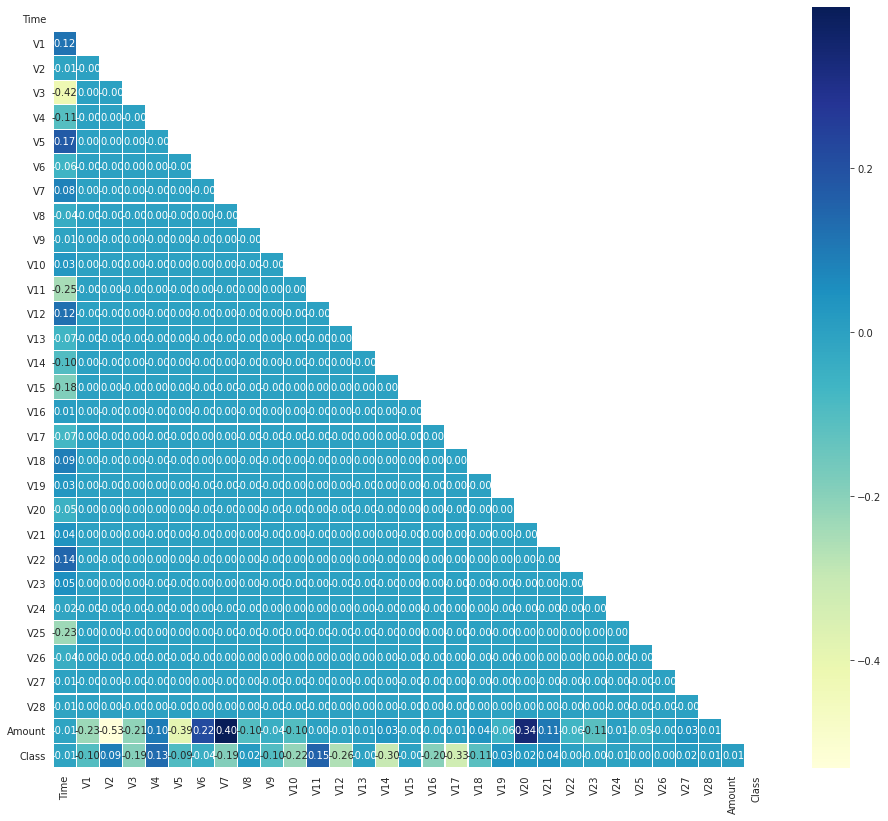

In [56]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
    plt.figure(figsize = (16,14))
    sns.heatmap(corr, mask=mask, linewidths=.1, cmap="YlGnBu", annot=True, fmt=".2f")

In [39]:
vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
#vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})

print('No Frauds Cases are ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[0,1])
print('Frauds Cases are', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[1,1])


No Frauds Cases are  99.83 % of the dataset i.e. 284315
Frauds Cases are 0.17 % of the dataset i.e. 492


**Note**: We can see how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

### LEts visualise this distribution- using Bar Plot and Pie Charts

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

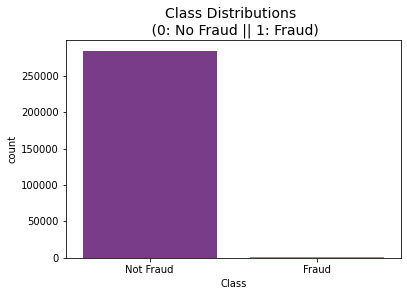

In [52]:
fig = sns.countplot(x = 'Class', data = df, palette='CMRmap')
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=0);
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Visualising in Pie Chart

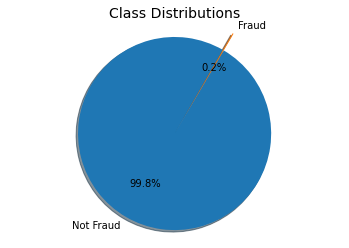

In [55]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(df['Class'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.title('Class Distributions', fontsize=14)
plt.show()

* Its clearly shows the skewness of the Classes.

* Lets see the  distribution of the other Columns

### Correlation Types

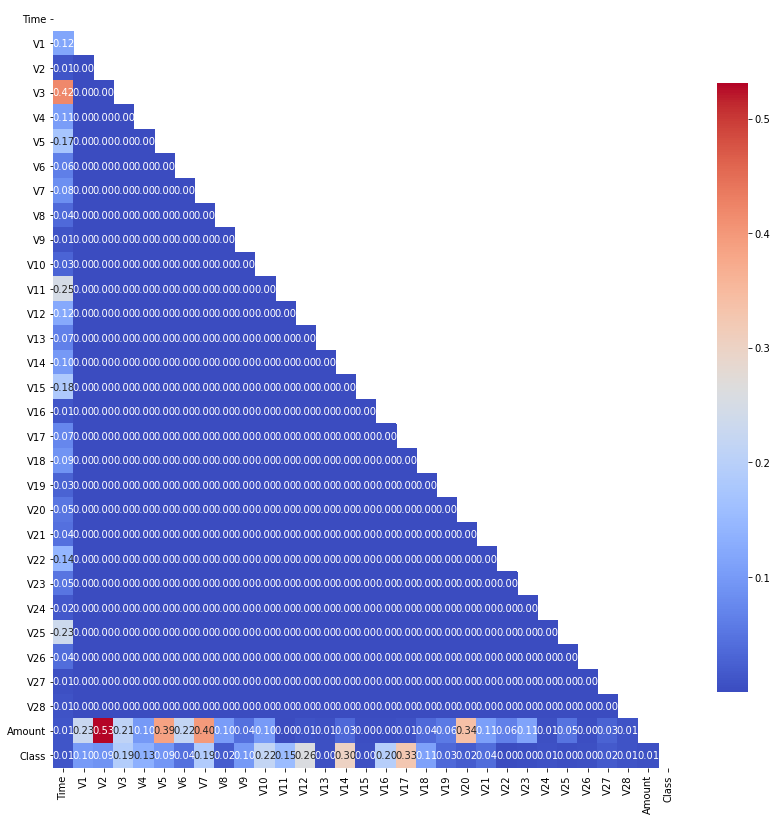

In [42]:
#Type 1
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(14, 14))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

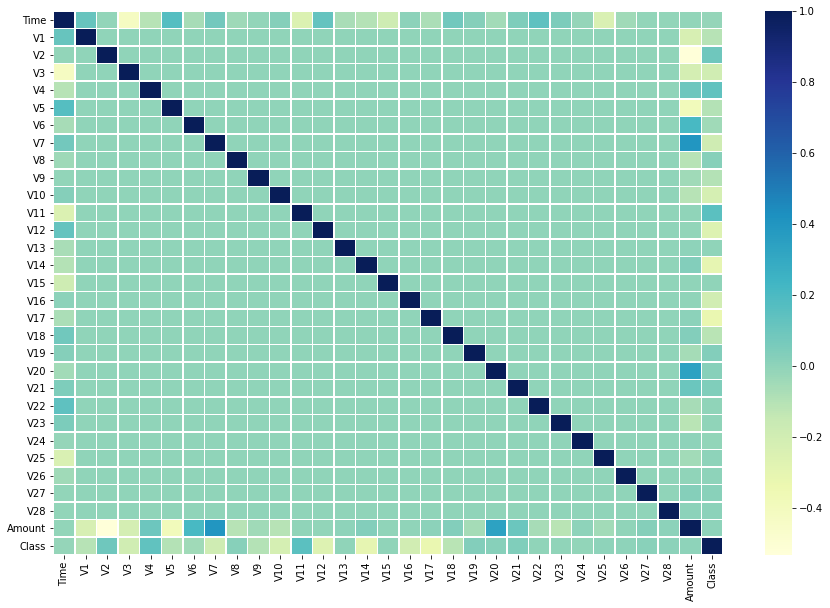

In [57]:
#Type2
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=False, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");